In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("/home/user812/Desktop/assignment/gdpWorld.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
# The data here is not in float type. To convert it into float commas(,) must be replaced
# with dots(.) and few more steps...

df.replace(',', '.', regex=True, inplace=True)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,NaN,NaN,NaN


In [4]:
len(df)


227

In [5]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

In [6]:
# To convert the data type to float.

def obj_to_float():
    col = {}
    for i in ls:
        col[i] = 'float64'
    return col

ls = ['Net migration', 'Infant mortality (per 1000 births)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)',  'Birthrate', 'Deathrate', 'Agriculture', 'Industry','Service', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)']
dic1 = obj_to_float()

In [7]:
df = df.astype(dic1)
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                    float64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                                object
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [8]:
# To find out that are there null values in dataset

df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [9]:
# To fill the null values with appropriate method.

ls1 = ['GDP ($ per capita)', 'Climate'] 
ls.extend(ls1)

def null_fill():
    for i in ls:
        if i == 'Climate':
            df[i].fillna(df[i].mode,inplace=True)
        else:
            df[i].fillna(df[i].mean(),inplace=True)
        
null_fill()

In [10]:
# Putting GDP column at the end of dataset  

df1=pd.DataFrame(df)
first_column=df.pop('GDP ($ per capita)')
df.insert(19,'GDP ($ per capita)',first_column)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,GDP ($ per capita)
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,36.0,3.2,12.13,0.22,87.65,1,46.60,20.34,0.380000,0.240000,0.380000,700.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232000,0.188000,0.579000,4500.0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101000,0.600000,0.298000,6000.0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,97.0,259.5,10.00,15.00,75.00,2,22.46,3.27,0.150844,0.282711,0.565283,8000.0
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,100.0,497.2,2.22,0.00,97.78,3,8.71,6.25,0.150844,0.282711,0.565283,19000.0


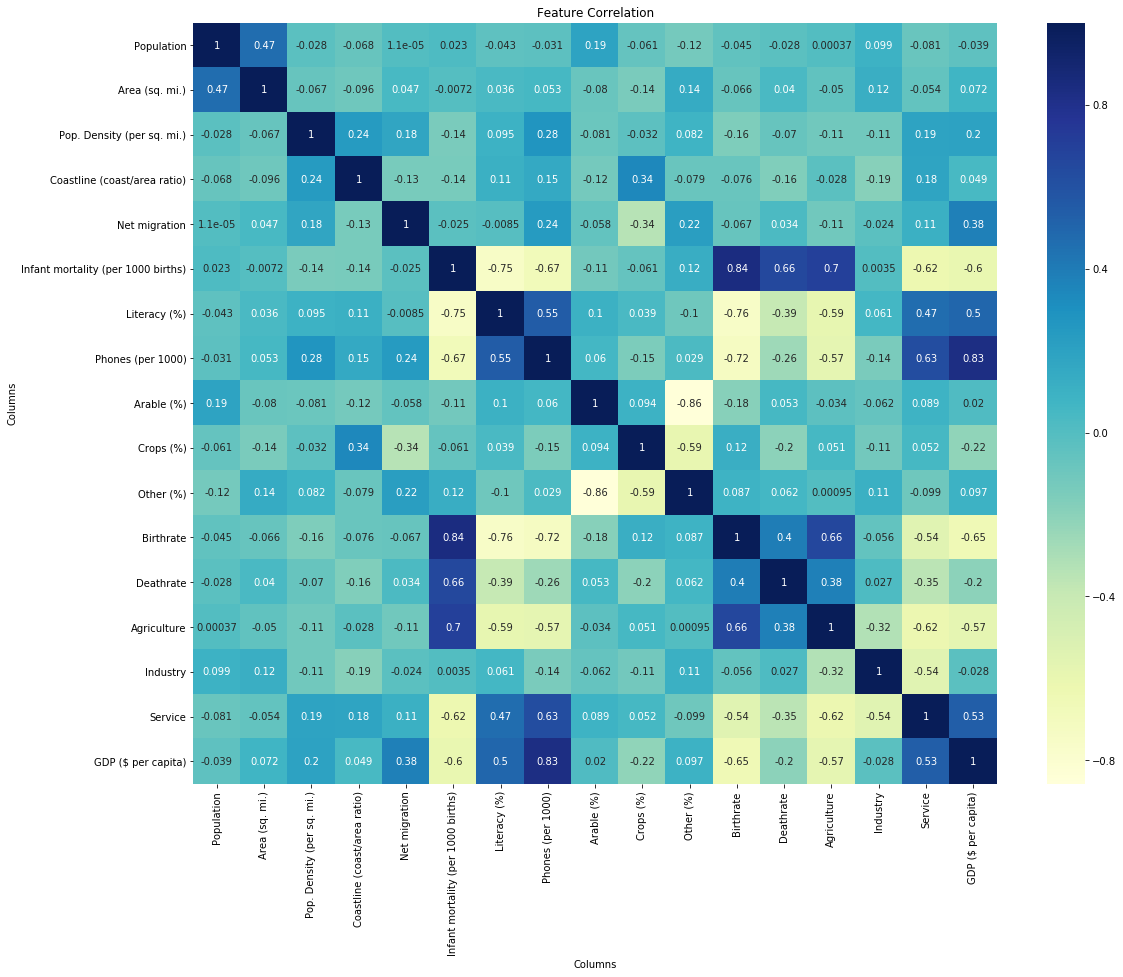

In [11]:
# To find out factors affecting GDP of countries


fig, ax = plt.subplots(figsize=(18,14)) 
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='YlGnBu').set(title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

/usr/lib/python3/dist-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


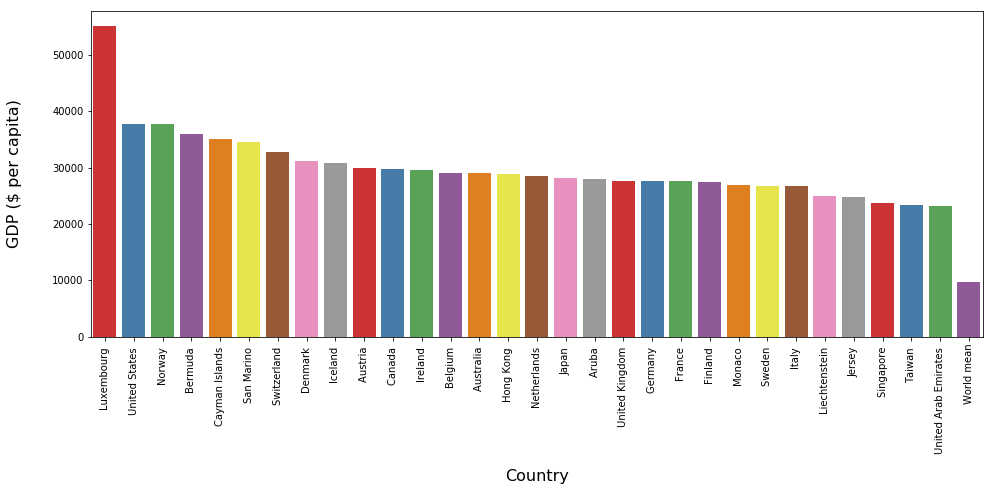

In [12]:
# Grphical representation of GDP per capita of top 30 Countries

fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False).head(30)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[df['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

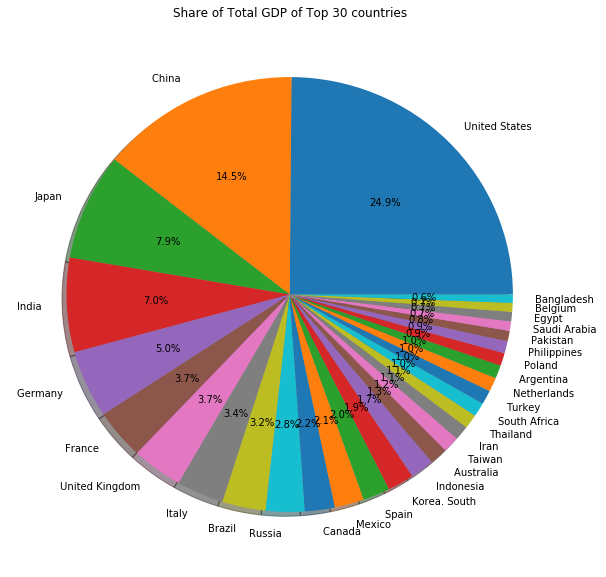

In [13]:
# Illustration of share of total GDP of top 30 countries through pie chart

df['Total_GDP'] = df['GDP ($ per capita)'] * df['Population']
plt.subplots(figsize=(10,10))
gdp=df.sort_values('Total_GDP',ascending=False).head(30)
plt.title("Share of Total GDP of Top 30 countries")
plt.pie(gdp['Total_GDP'],labels=gdp['Country'],autopct='%1.1f%%',shadow=True);

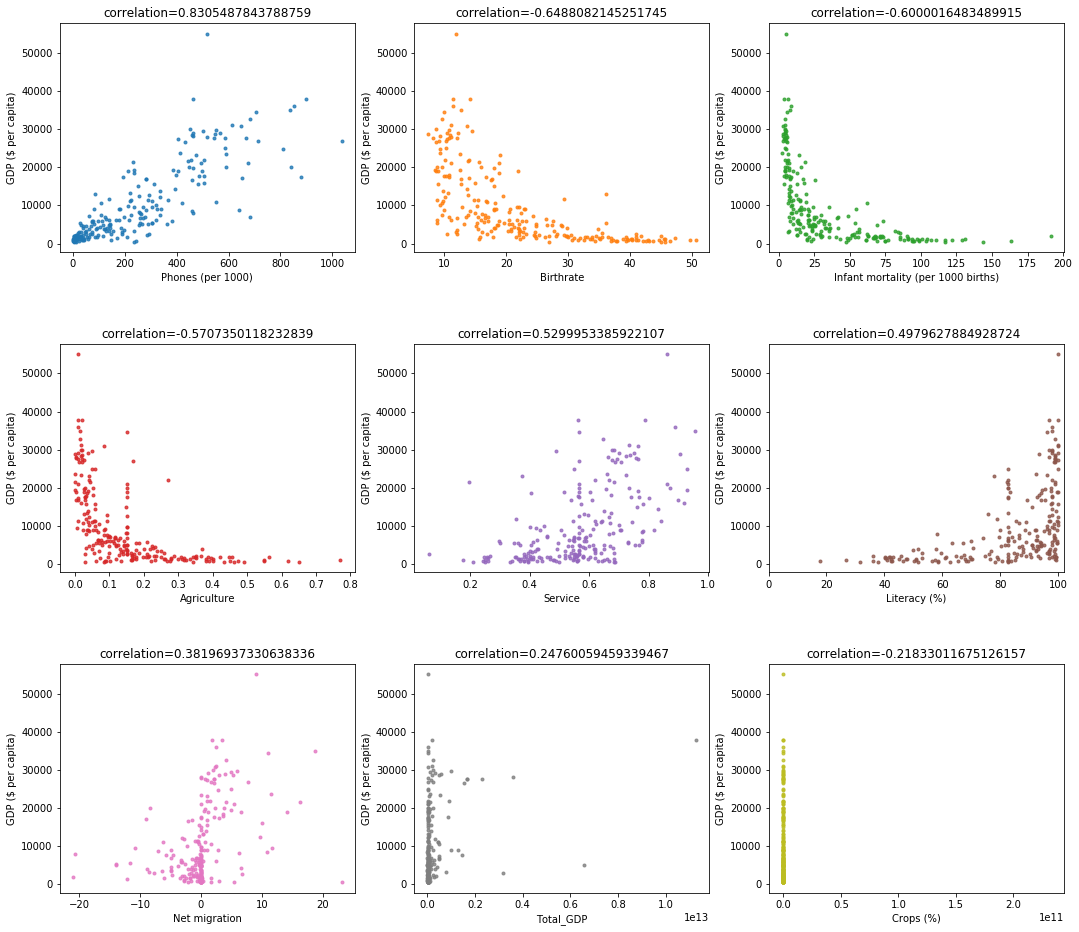

In [14]:
# Corelation of various factors with GDP per capita 

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18,16))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [15]:
train, test = train_test_split(df, test_size=0.3)
training_features = ['Pop. Density (per sq. mi.)',
       'Literacy (%)', 'Industry', 'Phones (per 1000)', 'Agriculture', 'Net migration']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [16]:
len(train_Y)

158

In [17]:
# predicting based on Linear Regression model

model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)
score = model.predict(test_X)

rmse_train1 = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train1 = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test1 = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test1 = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train1,'msle_train:',msle_train1)
print('rmse_test:',rmse_test1,'msle_test:',msle_test1)
print(f"R2_Score: {r2_score(test_Y, score)*100}")

rmse_train: 5245.30855003243 msle_train: 3.6753033316660235
rmse_test: 4468.192621509785 msle_test: 3.755140087348336
R2_Score: 73.07235693621102


In [18]:
ELS=ElasticNet(random_state=70)
ELS.fit(train_X,train_Y)

ElasticNet(random_state=70)

In [19]:
train_pred = ELS.predict(train_X)
test_pred = ELS.predict(test_X)
rmse_trainh = mean_squared_error(train_pred,train_Y,squared=False)
rmse_testh = mean_squared_error(test_pred, test_Y,squared=False)
score1=model.predict(test_X)

print("RMSE_train : ",rmse_trainh)
print("RMSE_test : ",rmse_testh)
print('R2_Score: ', r2_score(test_Y,score1)*100)

RMSE_train :  5351.3809089987135
RMSE_test :  4651.403603159426
R2_Score:  73.07235693621102


In [20]:
# predicting based on Random Forest model

model = RandomForestRegressor(n_estimators = 50,
                             max_depth = 6,
                             min_weight_fraction_leaf = 0.05,
                             max_features = 0.8,
                             random_state = 42)
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)
print('R2_Score: ', r2_score(test_Y,test_pred_Y)*100)

rmse_train: 3783.003191935783 msle_train: 0.24933249009028086
rmse_test: 3213.698807217782 msle_test: 0.27267393191903044
R2_Score:  86.15318848707815


In [21]:
# hyper parameter optimization Random Forest

op_model = RandomForestRegressor()
params = {'n_estimators':[x for x in range(1,100)], 'max_depth':[x for x in range(3,18)]}
grid_model = GridSearchCV(op_model, param_grid=params, verbose=2)
grid_model.fit(train_X,train_Y)

Fitting 5 folds for each of 1485 candidates, totalling 7425 fits
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=3, n_estimators=3; total time=   0.0s
[CV] END ........................max_depth=3

[CV] END .......................max_depth=3, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=23; total time=   0.0s
[CV] END .......................max_depth=3, n_estimators=23; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=3, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=43; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=3, n_estimators=62; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=62; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=62; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=64; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=64; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=64; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=64; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=3, n_estimators=82; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=83; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=83; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=83; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=83; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=83; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=84; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=84; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=84; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=84; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=84; total time=   0.1s
[CV] END .......................max_depth=3, n_estimators=85; total time=   0.1s
[CV] END ...................

[CV] END ........................max_depth=4, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=7; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=7; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=7; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=7; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=7; total time=   0.0s
[CV] END ........................max_depth=4, n_estimators=8; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=4, n_estimators=26; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=26; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=26; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=27; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=27; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=27; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=27; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=27; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=28; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=28; total time=   0.0s
[CV] END .......................max_depth=4, n_estimators=28; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=28; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=4, n_estimators=46; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=49; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=4, n_estimators=67; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=67; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=67; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=67; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=69; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=69; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=69; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=4, n_estimators=87; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=87; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=89; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=89; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=89; total time=   0.2s
[CV] END .......................max_depth=4, n_estimators=89; total time=   0.1s
[CV] END .......................max_depth=4, n_estimators=89; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=10; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=11; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=12; total time=   0.0s
[CV] END .......................max_depth=5, n_estimators=12; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=5, n_estimators=30; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=30; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=31; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=32; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=32; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=32; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=32; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=32; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=5, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=51; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=52; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=52; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=52; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=52; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=52; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=53; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=53; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=5, n_estimators=71; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=71; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=72; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=72; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=72; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=72; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=72; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=73; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=73; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=73; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=73; total time=   0.1s
[CV] END .......................max_depth=5, n_estimators=73; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=5, n_estimators=92; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=92; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=92; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=92; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=92; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=93; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=93; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=93; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=93; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=93; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=94; total time=   0.2s
[CV] END .......................max_depth=5, n_estimators=94; total time=   0.2s
[CV] END ...................

[CV] END .......................max_depth=6, n_estimators=13; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=13; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=14; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=14; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=14; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=14; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=14; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=15; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=15; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=15; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=15; total time=   0.0s
[CV] END .......................max_depth=6, n_estimators=15; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=6, n_estimators=34; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=34; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=34; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=35; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=35; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=35; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=35; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=35; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=36; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=36; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=36; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=36; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=6, n_estimators=55; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=55; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=55; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=55; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=55; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=56; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=56; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=56; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=56; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=56; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=57; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=57; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=6, n_estimators=75; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=75; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=75; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=76; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=76; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=76; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=76; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=76; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=77; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=77; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=77; total time=   0.1s
[CV] END .......................max_depth=6, n_estimators=77; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=6, n_estimators=95; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=96; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=96; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=96; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=96; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=96; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=97; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=97; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=97; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=97; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=97; total time=   0.2s
[CV] END .......................max_depth=6, n_estimators=98; total time=   0.2s
[CV] END ...................

[CV] END .......................max_depth=7, n_estimators=17; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=17; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=18; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=19; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=19; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=19; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=19; total time=   0.0s
[CV] END .......................max_depth=7, n_estimators=19; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=7, n_estimators=38; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=38; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=38; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=38; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=38; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=39; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=39; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=39; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=39; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=39; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=40; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=40; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=7, n_estimators=58; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=59; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=59; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=59; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=59; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=59; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=60; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=60; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=60; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=60; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=60; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=61; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=7, n_estimators=79; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=79; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=79; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=79; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=80; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=80; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=80; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=80; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=80; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=81; total time=   0.1s
[CV] END .......................max_depth=7, n_estimators=81; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=81; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=7, n_estimators=99; total time=   0.2s
[CV] END .......................max_depth=7, n_estimators=99; total time=   0.2s
[CV] END ........................max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=1; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=2; total time=   0.0s
[CV] END ........................max_depth=8, n_estimators=2; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=8, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=21; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=22; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=22; total time=   0.0s
[CV] END .......................max_depth=8, n_estimators=23; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=23; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=23; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=8, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=41; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=42; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=43; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=43; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=8, n_estimators=62; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=62; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=62; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=62; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=63; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=63; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=64; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=64; total time=   0.1s
[CV] END .......................max_depth=8, n_estimators=64; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=8, n_estimators=82; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=82; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=83; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=83; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=83; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=83; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=83; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=84; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=84; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=84; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=84; total time=   0.2s
[CV] END .......................max_depth=8, n_estimators=84; total time=   0.2s
[CV] END ...................

[CV] END ........................max_depth=9, n_estimators=4; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=4; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=5; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=6; total time=   0.0s
[CV] END ........................max_depth=9, n_estimators=6; total time=   0.0s
[CV] END ...................

[CV] END .......................max_depth=9, n_estimators=25; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=25; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=26; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=26; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=26; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=26; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=26; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=27; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=27; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=27; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=27; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=27; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=9, n_estimators=46; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=46; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=46; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=47; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=48; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=48; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=9, n_estimators=66; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=67; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=67; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=67; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=67; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=67; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=68; total time=   0.1s
[CV] END .......................max_depth=9, n_estimators=69; total time=   0.1s
[CV] END ...................

[CV] END .......................max_depth=9, n_estimators=87; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=87; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=87; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=87; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=88; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=89; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=89; total time=   0.2s
[CV] END .......................max_depth=9, n_estimators=89; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=12; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=12; total time=   0.0s
[CV] END ......................max_depth=10, n_estimators=12; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=10, n_estimators=30; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=33; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=10, n_estimators=51; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=51; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=53; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=53; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=53; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=53; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=53; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=10, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=74; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=74; total time=   0.1s
[CV] END ......................max_depth=10, n_estimators=74; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=10, n_estimators=92; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=10, n_estimators=95; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=11, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=16; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=16; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=16; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=16; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=16; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=17; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=17; total time=   0.0s
[CV] END ......................max_depth=11, n_estimators=17; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=11, n_estimators=35; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=35; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=37; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=37; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=37; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=37; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=37; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=11, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=57; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=57; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=57; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=57; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=57; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=58; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=58; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=11, n_estimators=76; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=76; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=76; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=77; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=77; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=77; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=77; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=77; total time=   0.1s
[CV] END ......................max_depth=11, n_estimators=78; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=78; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=78; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=78; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=11, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=98; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=98; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=98; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=98; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=98; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=99; total time=   0.2s
[CV] END ......................max_depth=11, n_estimators=99; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=12, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=21; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=21; total time=   0.0s
[CV] END ......................max_depth=12, n_estimators=21; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=12, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=41; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=41; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=41; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=41; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=41; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=42; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=42; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=12, n_estimators=60; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=60; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=60; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=61; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=61; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=61; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=61; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=61; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=62; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=62; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=62; total time=   0.1s
[CV] END ......................max_depth=12, n_estimators=62; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=12, n_estimators=80; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=82; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=82; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=82; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=82; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=82; total time=   0.2s
[CV] END ......................max_depth=12, n_estimators=83; total time=   0.2s
[CV] END ...................

[CV] END .......................max_depth=13, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=5; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=6; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=6; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=6; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=6; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=6; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=7; total time=   0.0s
[CV] END .......................max_depth=13, n_estimators=7; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=13, n_estimators=26; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=26; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=26; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=26; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=26; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=27; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=27; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=27; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=27; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=27; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=28; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=28; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=13, n_estimators=46; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=46; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=46; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=47; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=47; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=47; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=47; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=47; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=48; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=48; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=48; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=48; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=13, n_estimators=66; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=67; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=67; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=67; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=67; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=67; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=68; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=68; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=68; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=68; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=68; total time=   0.1s
[CV] END ......................max_depth=13, n_estimators=69; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=13, n_estimators=87; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=87; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=87; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=88; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=88; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=88; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=88; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=88; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=89; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=89; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=89; total time=   0.2s
[CV] END ......................max_depth=13, n_estimators=89; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=14, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=10; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=11; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=12; total time=   0.0s
[CV] END ......................max_depth=14, n_estimators=12; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=14, n_estimators=30; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=30; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=31; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=32; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=32; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=14, n_estimators=51; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=51; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=51; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=52; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=53; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=53; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=53; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=53; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=14, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=72; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=73; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=74; total time=   0.1s
[CV] END ......................max_depth=14, n_estimators=74; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=14, n_estimators=92; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=92; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=92; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=93; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=94; total time=   0.2s
[CV] END ......................max_depth=14, n_estimators=94; total time=   0.3s
[CV] END ...................

[CV] END ......................max_depth=15, n_estimators=13; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=14; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=14; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=14; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=14; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=14; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=15; total time=   0.0s
[CV] END ......................max_depth=15, n_estimators=16; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=15, n_estimators=34; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=34; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=34; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=35; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=35; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=35; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=35; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=35; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=36; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=36; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=15, n_estimators=55; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=55; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=55; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=55; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=55; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=56; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=57; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=57; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=15, n_estimators=75; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=75; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=76; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=76; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=76; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=76; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=76; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=77; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=77; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=77; total time=   0.1s
[CV] END ......................max_depth=15, n_estimators=77; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=77; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=15, n_estimators=96; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=96; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=96; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=96; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=97; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=98; total time=   0.2s
[CV] END ......................max_depth=15, n_estimators=98; total time=   0.3s
[CV] END ......................max_depth=15, n_estimators=98; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=16, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=18; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=19; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=20; total time=   0.0s
[CV] END ......................max_depth=16, n_estimators=20; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=16, n_estimators=38; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=38; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=38; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=39; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=39; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=39; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=39; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=39; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=40; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=40; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=16, n_estimators=59; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=59; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=59; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=59; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=59; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=60; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=60; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=60; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=60; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=60; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=61; total time=   0.1s
[CV] END ......................max_depth=16, n_estimators=61; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=16, n_estimators=79; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=79; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=79; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=80; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=80; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=80; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=80; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=80; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=81; total time=   0.2s
[CV] END ......................max_depth=16, n_estimators=81; total time=   0.2s
[CV] END ...................

[CV] END ......................max_depth=16, n_estimators=99; total time=   0.2s
[CV] END .......................max_depth=17, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=1; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=2; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=2; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=2; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=2; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=2; total time=   0.0s
[CV] END .......................max_depth=17, n_estimators=3; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=17, n_estimators=21; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=22; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=22; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=22; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=22; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=22; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=23; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=23; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=23; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=23; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=23; total time=   0.0s
[CV] END ......................max_depth=17, n_estimators=24; total time=   0.0s
[CV] END ...................

[CV] END ......................max_depth=17, n_estimators=42; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=42; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=43; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=43; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=43; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=43; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=43; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=44; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=44; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=44; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=44; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=44; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=17, n_estimators=63; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=63; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=63; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=63; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=64; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=64; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=64; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=64; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=64; total time=   0.1s
[CV] END ......................max_depth=17, n_estimators=65; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=65; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=65; total time=   0.1s
[CV] END ...................

[CV] END ......................max_depth=17, n_estimators=83; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=83; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=84; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=84; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=84; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=84; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=84; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=85; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=85; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=85; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=85; total time=   0.2s
[CV] END ......................max_depth=17, n_estimators=85; total time=   0.2s
[CV] END ...................

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             verbose=2)

In [22]:
grid_model.best_estimator_

RandomForestRegressor(max_depth=9, n_estimators=10)

In [27]:
op_model = RandomForestRegressor(max_depth=9, n_estimators=10)
op_model.fit(train_X,train_Y)
train_pred = op_model.predict(train_X)
test_pred = op_model.predict(test_X)
rmse_trainrh = mean_squared_error(train_pred, train_Y,squared=False)
rmse_testrh = mean_squared_error(test_pred, test_Y,squared=False)
score3=op_model.predict(test_X)

print("RMSE_train : ",rmse_trainrh)
print("RMSE_test : ",rmse_testrh)
print('R2_Score: ', r2_score(test_Y,score3)*100)

RMSE_train :  2110.645331358936
RMSE_test :  3885.2932387966853
R2_Score:  79.76109359600689


Text(0,0.5,'Root mean squared error')

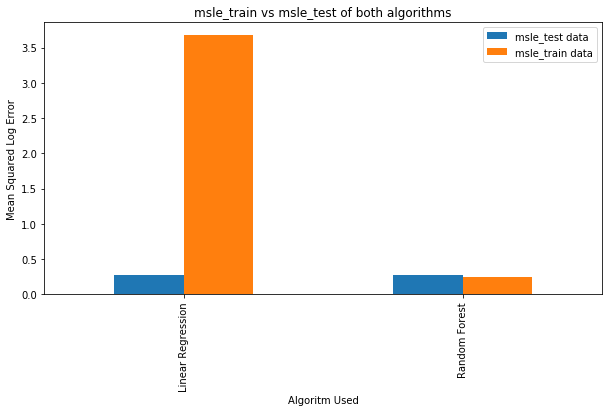

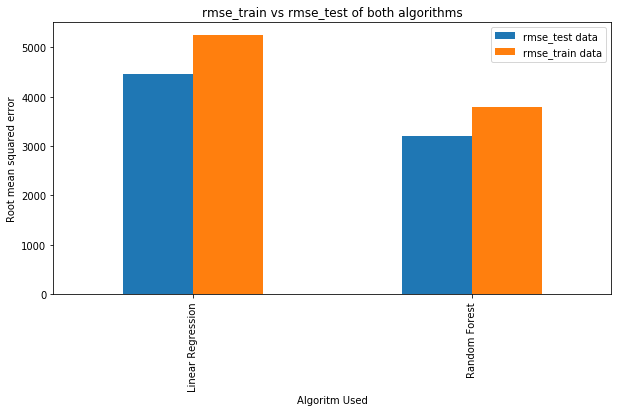

In [29]:

plotdata = pd.DataFrame({

    "msle_train data":[msle_train1,msle_train],

    "msle_test data":[msle_test,msle_test]},

    index=[ "Linear Regression","Random Forest"])


plotdata.plot(kind="bar",figsize=(10, 5))

plt.title("msle_train vs msle_test of both algorithms")

plt.xlabel("Algoritm Used")

plt.ylabel("Mean Squared Log Error")

plotdata = pd.DataFrame({

    "rmse_train data":[rmse_train1,rmse_train]
    ,

    "rmse_test data":[rmse_test1,rmse_test]},

    index=[ "Linear Regression","Random Forest"])


plotdata.plot(kind="bar",figsize=(10, 5))

plt.title("rmse_train vs rmse_test of both algorithms")

plt.xlabel("Algoritm Used")

plt.ylabel("Root mean squared error")

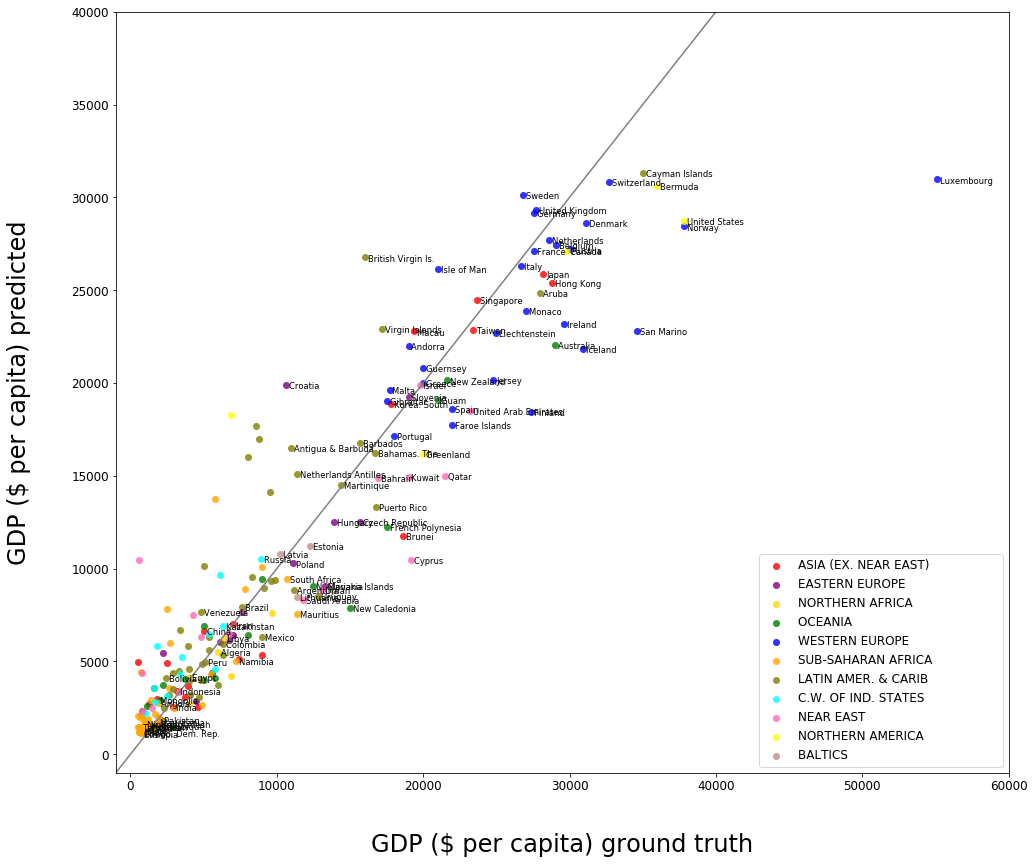

In [30]:
plt.figure(figsize=(16,14))

train_test_Y = train_Y.append(test_Y)
train_test_pred_Y = train_pred_Y.append(test_pred_Y)

data_shuffled = df.loc[train_test_Y.index]
label = data_shuffled['Country']

colors = {'ASIA (EX. NEAR EAST)         ':'red',
          'EASTERN EUROPE                     ':'purple',
          'NORTHERN AFRICA                    ':'gold',
          'OCEANIA                            ':'green',
          'WESTERN EUROPE                     ':'blue',
          'SUB-SAHARAN AFRICA                 ':'orange',
          'LATIN AMER. & CARIB    ':'olive',
          'C.W. OF IND. STATES ':'cyan',
          'NEAR EAST                          ':'hotpink',
          'NORTHERN AMERICA                   ':'yellow',
          'BALTICS                            ':'rosybrown'}

for region, color in colors.items():
    X = train_test_Y.loc[data_shuffled['Region']==region]
    Y = train_test_pred_Y.loc[data_shuffled['Region']==region]
    ax = sns.regplot(x=X, y=Y, marker='.', fit_reg=False, color=color, scatter_kws={'s':200, 'linewidths':0}, label=region) 
plt.legend(loc=4,prop={'size': 12})  

ax.set_xlabel('GDP ($ per capita) ground truth',labelpad=40)
ax.set_ylabel('GDP ($ per capita) predicted',labelpad=40)
ax.xaxis.label.set_fontsize(24)
ax.yaxis.label.set_fontsize(24)
ax.tick_params(labelsize=12)

x = np.linspace(-1000,50000,100) # 100 linearly spaced numbers
y = x
plt.plot(x,y,c='gray')

plt.xlim(-1000,60000)
plt.ylim(-1000,40000)

for i in range(0,train_test_Y.shape[0]):
    if((data_shuffled['Area (sq. mi.)'].iloc[i]>8e5) |
       (data_shuffled['Population'].iloc[i]>1e8) |
       (data_shuffled['GDP ($ per capita)'].iloc[i]>10000)):
        plt.text(train_test_Y.iloc[i]+200, train_test_pred_Y.iloc[i]-200, label.iloc[i], size='small')

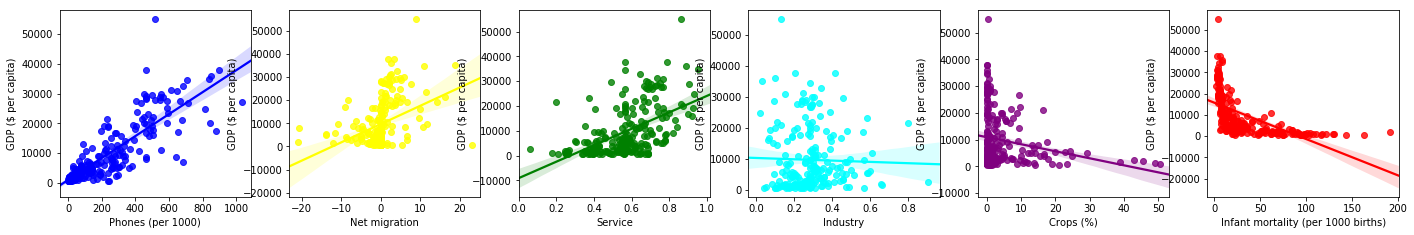

In [31]:
plt.figure(figsize=(24,24))
plt.subplot(6,6,1)
sns.regplot(x='Phones (per 1000)',y='GDP ($ per capita)',data=df,color='blue')

plt.subplot(6,6,2)
sns.regplot(x='Net migration',y='GDP ($ per capita)',data=df,color='yellow')

plt.subplot(6,6,3)
sns.regplot(x='Service',y='GDP ($ per capita)',data=df,color='green')

plt.subplot(6,6,4)
sns.regplot(x='Industry',y='GDP ($ per capita)',data=df,color='cyan')

plt.subplot(6,6,5)
sns.regplot(x='Crops (%)',y='GDP ($ per capita)',data=df,color='purple')

plt.subplot(6,6,6)
sns.regplot(x=df['Infant mortality (per 1000 births)'],y='GDP ($ per capita)',data=df,color='red')